In [2]:
import cmdstanpy

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats


In [ ]:
!pip install --upgrade cmdstanpy

In [3]:
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
Download successful, file: /tmp/tmpolrl2w_k
Extracting distribution


DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.31.0
Building version cmdstan-2.31.0, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Test model compilation
Installed cmdstan-2.31.0


True

Loading DataFrame

In [12]:
df = pd.read_csv('data.csv')
df.head()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0


Prior predictive checks

In [5]:
model = cmdstanpy.CmdStanModel(stan_file='model1.stan')

# sample from the posterior distribution
samples = model.sample(data={},
                       fixed_param=True, 
                       iter_sampling=1000,
                       iter_warmup=0,
                       chains = 1)
data = samples.draws_pd()

04:49:22 - cmdstanpy - INFO - compiling stan file /content/model1.stan to exe file /content/model1
INFO:cmdstanpy:compiling stan file /content/model1.stan to exe file /content/model1
DEBUG:cmdstanpy:cmd: make /content/model1
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/model1.hpp /content/model1.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/model1.o /content/model1.hpp
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-comp

chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model1', 'id=1', 'random', 'seed=96569', 'data', 'file=/tmp/tmpkind4wzf/ht73t29p.json', 'output', 'file=/tmp/tmpkind4wzf/model1jz5wytgw/model1-20230420044934.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


04:49:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/model1', 'id=1', 'random', 'seed=96569', 'data', 'file=/tmp/tmpkind4wzf/ht73t29p.json', 'output', 'file=/tmp/tmpkind4wzf/model1jz5wytgw/model1-20230420044934.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpkind4wzf/model1jz5wytgw/model1-20230420044934.csv
 console_msgs (if any):
	/tmp/tmpkind4wzf/model1jz5wytgw/model1-20230420044934_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 =

Text(0.5, 0, 'y')

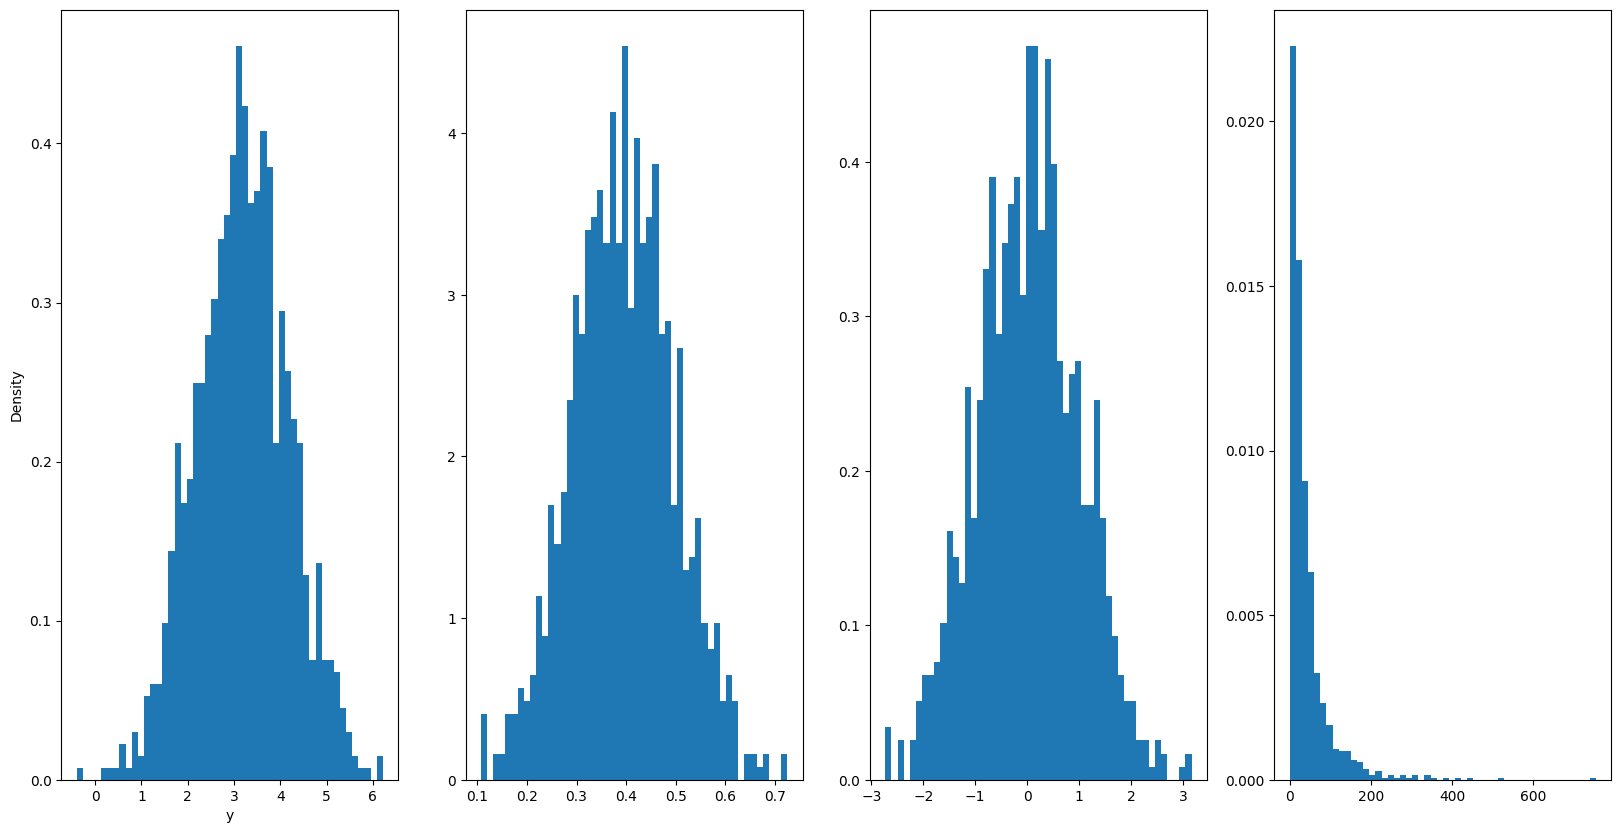

In [10]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=[20,10])

ax[0].hist(data['alpha'], density=True, bins=50)
ax[0].set_ylabel("Density")
ax[0].set_xlabel("alpha")
ax[1].hist(data['theta'], density=True, bins=50)
ax[0].set_ylabel("Density")
ax[0].set_xlabel("theta")
ax[2].hist(data['n'], density=True, bins=50)
ax[0].set_ylabel("Density")
ax[0].set_xlabel("n")
ax[3].hist(data['y'], density=True, bins=50)
ax[0].set_ylabel("Density")
ax[0].set_xlabel("y")



In [41]:
model_fit = cmdstanpy.CmdStanModel(stan_file='model1_fit.stan')

data_sim={"N": df.shape[0], 
          "val": df["Miles flown [100 mln miles]"].values,
          "y": df["Fatal accidents"].values}

fit_samples = model_fit.sample(data=data_sim)
data_fit = fit_samples.draws_pd()

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkind4wzf/juqv9oov.json
DEBUG:cmdstanpy:cmd: /content/model1_fit info
cwd: None
05:13:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model1_fit', 'id=1', 'random', 'seed=97016', 'data', 'file=/tmp/tmpkind4wzf/juqv9oov.json', 'output', 'file=/tmp/tmpkind4wzf/model1_fitnxvlskd8/model1_fit-20230420051348_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model1_fit', 'id=2', 'random', 'seed=97016', 'data', 'file=/tmp/tmpkind4wzf/juqv9oov.json', 'output', 'file=/tmp/tmpkind4wzf/model1_fitnxvlskd8/model1_fit-20230420051348_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model1_fit', 'id=3', 'random', 'seed=97016', 'data', 'file=/tmp/tmpkind4wzf/juqv9oov.json', 'output', 'file=/tmp/tmpkind4wzf/model1_fitnxvlskd8/model1_fit-20230420051348_3.csv', 'method=sample', 'alg

05:13:52 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/model1_fit', 'id=1', 'random', 'seed=97016', 'data', 'file=/tmp/tmpkind4wzf/juqv9oov.json', 'output', 'file=/tmp/tmpkind4wzf/model1_fitnxvlskd8/model1_fit-20230420051348_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpkind4wzf/model1_fitnxvlskd8/model1_fit-20230420051348_1.csv
 console_msgs (if any):
	/tmp/tmpkind4wzf/model1_fitnxvlskd8/model1_fit-20230420051348_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default

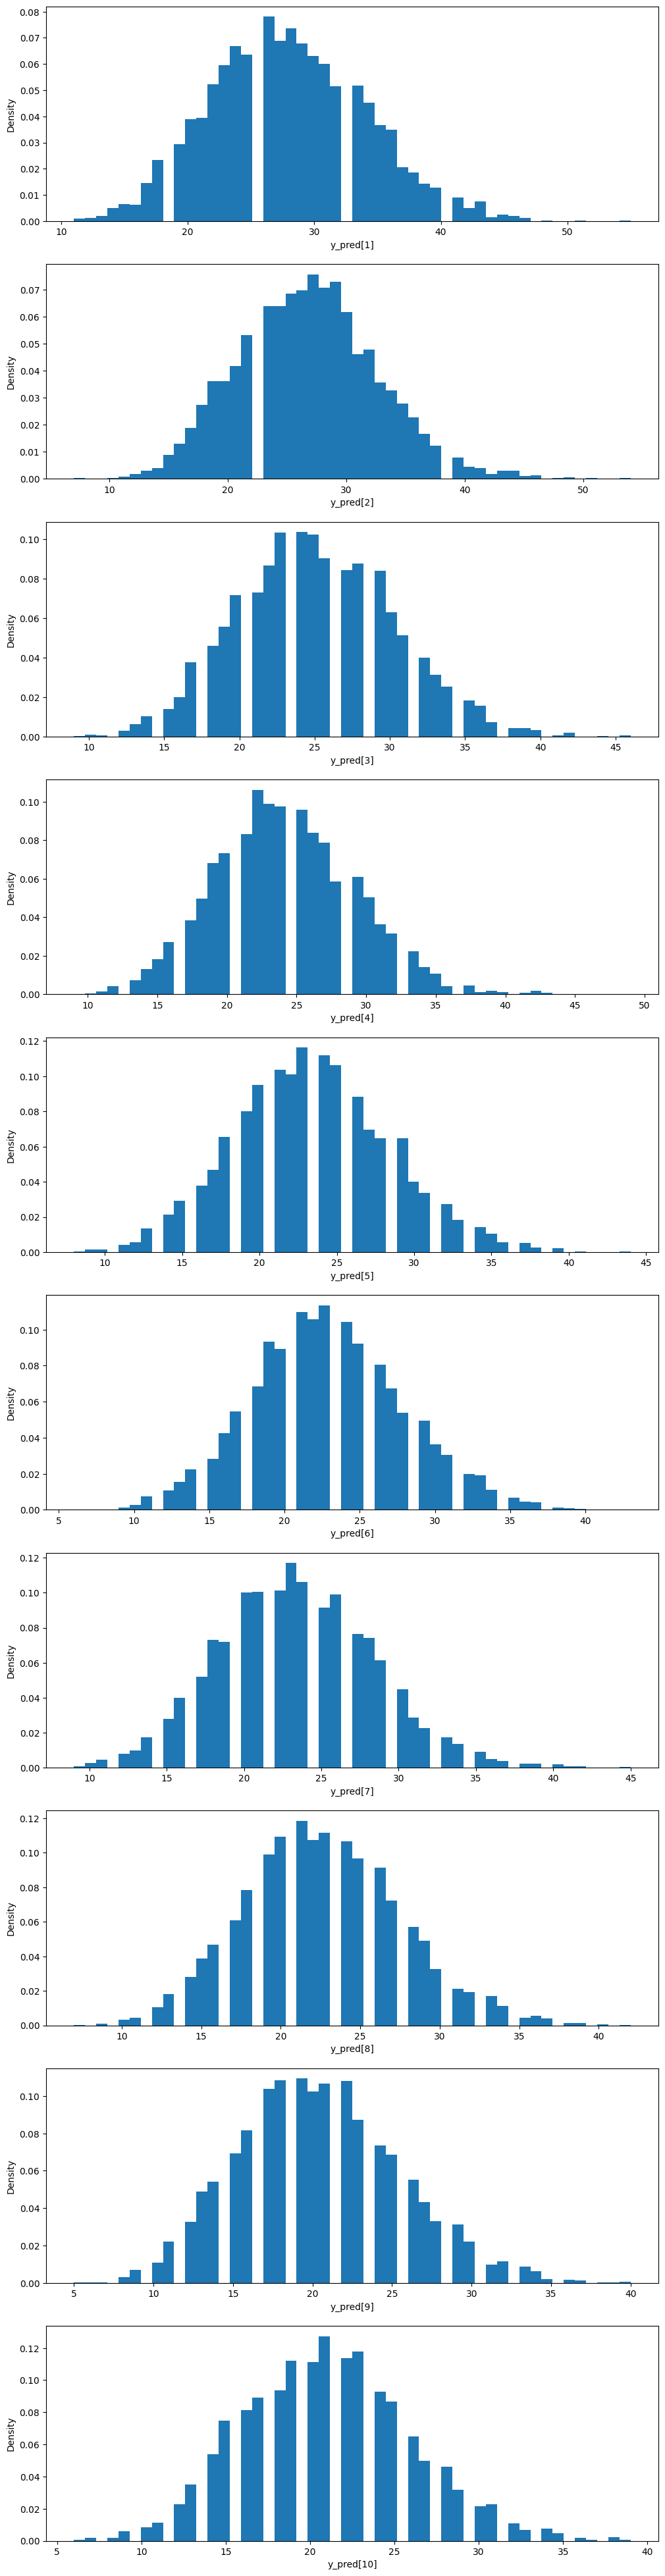

In [43]:
_, ax = plt.subplots(nrows=10, figsize=(12, 10*5))

for i, year in enumerate(df["Year"]):
  ax[i].hist(data_fit[f'y_pred[{i+1}]'], density=True, bins=50)
  ax[i].set_ylabel("Density")
  ax[i].set_xlabel(f'y_pred[{i+1}]')


Improved model


In [44]:
model_fit2 = cmdstanpy.CmdStanModel(stan_file='model2_fit.stan')

samples = model_fit.sample(data=data_sim)
data_fit2 = samples.draws_pd()

05:16:32 - cmdstanpy - INFO - compiling stan file /content/model2_fit.stan to exe file /content/model2_fit
INFO:cmdstanpy:compiling stan file /content/model2_fit.stan to exe file /content/model2_fit
DEBUG:cmdstanpy:cmd: make /content/model2_fit
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/model2_fit.hpp /content/model2_fit.stan
Warning in '/content/model2_fit.stan', line 3, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/content/model2_fit.stan', line 4, column 4: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-f

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model1_fit', 'id=1', 'random', 'seed=34788', 'data', 'file=/tmp/tmpkind4wzf/zrbjtlkv.json', 'output', 'file=/tmp/tmpkind4wzf/model1_fit7y019n8m/model1_fit-20230420051648_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model1_fit', 'id=2', 'random', 'seed=34788', 'data', 'file=/tmp/tmpkind4wzf/zrbjtlkv.json', 'output', 'file=/tmp/tmpkind4wzf/model1_fit7y019n8m/model1_fit-20230420051648_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model1_fit', 'id=3', 'random', 'seed=34788', 'data', 'file=/tmp/tmpkind4wzf/zrbjtlkv.json', 'output', 'file=/tmp/tmpkind4wzf/model1_fit7y019n8m/model1_fit-20230420051648_3.csv', 'method=sample', 'alg

05:16:53 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/model1_fit', 'id=1', 'random', 'seed=34788', 'data', 'file=/tmp/tmpkind4wzf/zrbjtlkv.json', 'output', 'file=/tmp/tmpkind4wzf/model1_fit7y019n8m/model1_fit-20230420051648_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpkind4wzf/model1_fit7y019n8m/model1_fit-20230420051648_1.csv
 console_msgs (if any):
	/tmp/tmpkind4wzf/model1_fit7y019n8m/model1_fit-20230420051648_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default

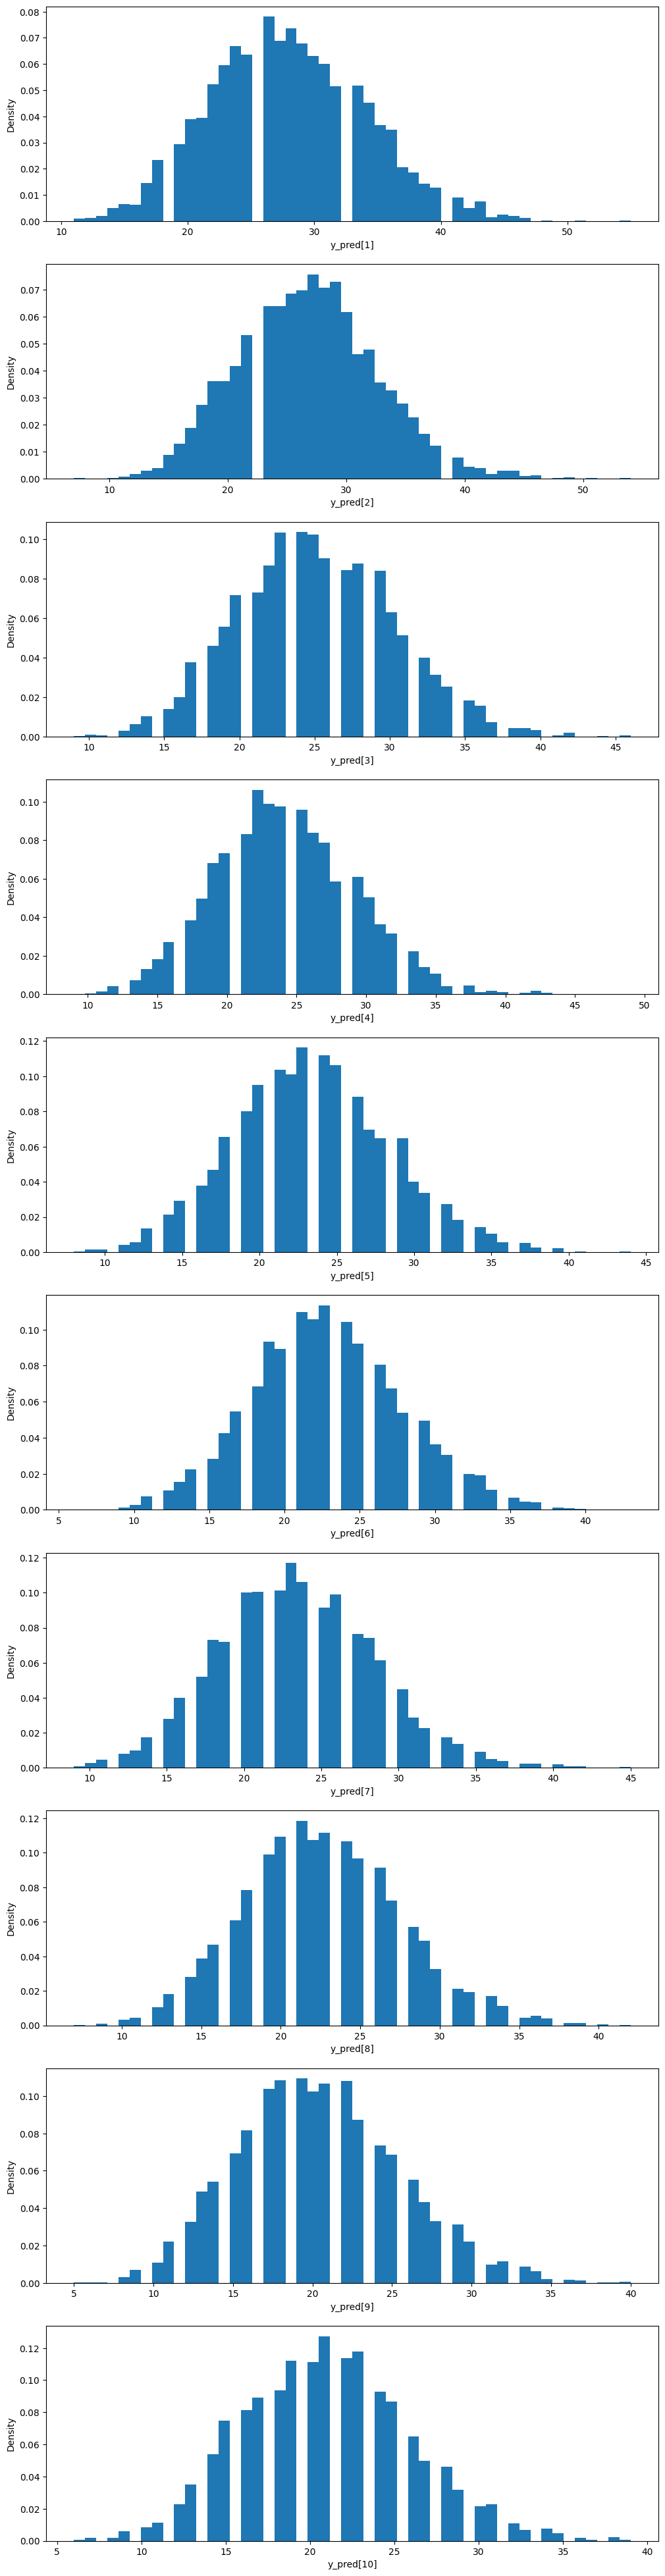

In [45]:
_, ax = plt.subplots(nrows=10, figsize=(12, 10*5))

for i, year in enumerate(df["Year"]):
  ax[i].hist(data_fit[f'y_pred[{i+1}]'], density=True, bins=50)
  ax[i].set_ylabel("Density")
  ax[i].set_xlabel(f'y_pred[{i+1}]')
